# Figure 10

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

import sys

sys.path.append('../src')

from Config.config import PATHS

import warnings
warnings.filterwarnings("ignore")

In [200]:
from Utils.interaction import Performer
from Utils.indices import AlternationIndex
from Utils.utils import GetMeasurements, Grid
from Classes.cognitive_model_agents import FocalRegionAgent

In [178]:
fixed_parameters = {
	"num_agents": 2,
	"threshold": 0.5,
}
free_parameters = {
    'inverse_temperature': 6, 
    'len_history': 2, 
    'c': 0.7, 
}
simulation_parameters = {
	'num_rounds': 50,
    'num_episodes': 50,
	'verbose': False
}

In [179]:
df_list = []

for N in [2, 3]:
    for len_history in [1, 2]:
        for c in [0.5, 0.7, 0.9]:
            free_parameters['c'] = c
            if N == 3:
                free_parameters['len_history'] = len_history + 1
            else:
                free_parameters['len_history'] = len_history                
            fixed_parameters['num_agents'] = N
            raw_df = Performer.sim(
                agent_class=FocalRegionAgent,
                fixed_parameters=fixed_parameters,
                free_parameters=free_parameters,
                simulation_parameters=simulation_parameters
            )
            raw_df['threshold'] = fixed_parameters['threshold']
            raw_df['num_agents'] = fixed_parameters['num_agents']
            raw_df['len_history'] = free_parameters['len_history']
            raw_df['c'] = free_parameters['c']
            raw_df['model'] = f"c={c}; len_history={free_parameters['len_history']}; num_players={N}"
            df_list.append(raw_df)

raw_df = pd.concat(df_list, ignore_index=True)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 0.98, 'Focal Regions as Attractors')

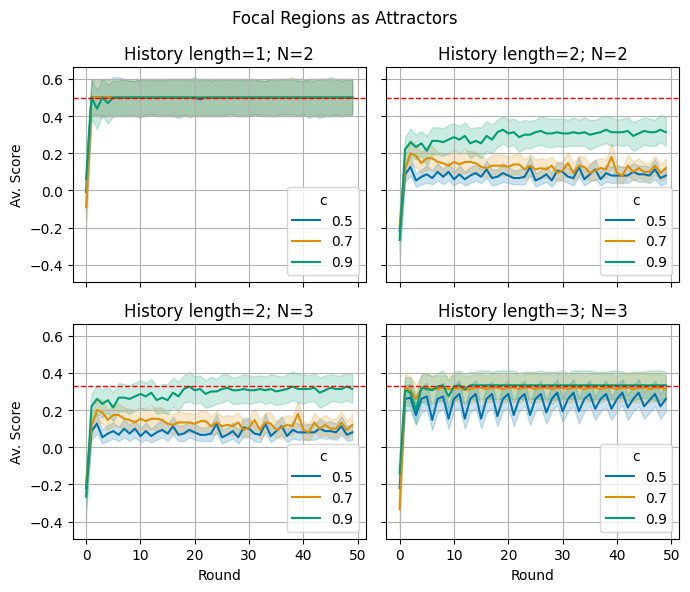

In [201]:
grid = Grid(4)
fig, axes = plt.subplots(
    grid.rows, grid.cols,
    figsize=(grid.cols * 3.5, grid.rows * 3),
    tight_layout=True,
    sharex=True, sharey=True    
)

sns.lineplot(
    x='round', y='score', hue='c',
    data=raw_df[(raw_df['len_history'] == 2) & (raw_df['num_agents'] == 2)], 
    ax=axes[0, 0], palette='colorblind'
)
axes[0, 0].set_title('History length=1; N=2')
axes[0, 0].axhline(y=0.5, color='red', linestyle='--', linewidth=1)

sns.lineplot(
    x='round', y='score', hue='c',
    data=raw_df[(raw_df['len_history'] == 2) & (raw_df['num_agents'] == 3)], 
    ax=axes[0, 1], palette='colorblind'
)
axes[0, 1].set_title('History length=2; N=2')
axes[0, 1].axhline(y=0.5, color='red', linestyle='--', linewidth=1)

sns.lineplot(
    x='round', y='score', hue='c',
    data=raw_df[(raw_df['len_history'] == 2) & (raw_df['num_agents'] == 3)], 
    ax=axes[1, 0], palette='colorblind'
)
axes[1, 0].set_title('History length=2; N=3')
axes[1, 0].axhline(y=0.33, color='red', linestyle='--', linewidth=1)

sns.lineplot(
    x='round', y='score', hue='c',
    data=raw_df[(raw_df['len_history'] == 3) & (raw_df['num_agents'] == 3)], 
    ax=axes[1, 1], palette='colorblind'
)
axes[1, 1].set_title('History length=3; N=3')
axes[1, 1].axhline(y=0.33, color='red', linestyle='--', linewidth=1)

for f, c in grid:
    axes[f, c].set_xlabel('Round')
    axes[f, c].set_ylabel('Av. Score')
    axes[f, c].legend(title='')
    axes[f, c].grid()
    axes[f, c].legend(title='c')


fig.suptitle('Focal Regions as Attractors')


In [202]:
fig.savefig(PATHS['figures_for_paper'] / 'Figure10.png', dpi=300, bbox_inches='tight')

In [203]:
gm = GetMeasurements(raw_df, ['bounded_efficiency', 'inequality'])
idx = AlternationIndex.from_file()
df = gm.get_measurements()
df = idx.alt_precentage(df, columns=['model']).reset_index()
df['c'] = df['model'].apply(lambda x: x.split(';')[0].split('=')[1])
df['len_history'] = df['model'].apply(lambda x: x.split(';')[1].split('=')[1])
df['len_history'] = df['model'].apply(lambda x: x.split(';')[1].split('=')[1])
df['num_players'] = df['model'].apply(lambda x: x.split(';')[2].split('=')[1])
df['alternation_percentage'] = df['alternation_percentage'] * 100
alt_table = pd.pivot_table(
    data=df,
    index=['c'],
    values=['alternation_percentage'],
    columns=['num_players', 'len_history']
).fillna('-')
alt_table

alternation_percentage                  
num_players                      2           3      
len_history                      1     2     2     3
c                                                   
0.5                          100.0  72.0   0.0  16.0
0.7                          100.0  84.0  10.0  82.0
0.9                          100.0  78.0  64.0  98.0

In [205]:
print(alt_table.to_latex())

\begin{tabular}{lrrrr}
\toprule
 & \multicolumn{4}{r}{alternation_percentage} \\
num_players & \multicolumn{2}{r}{2} & \multicolumn{2}{r}{3} \\
len_history & 1 & 2 & 2 & 3 \\
c &  &  &  &  \\
\midrule
0.5 & 100.000000 & 72.000000 & 0.000000 & 16.000000 \\
0.7 & 100.000000 & 84.000000 & 10.000000 & 82.000000 \\
0.9 & 100.000000 & 78.000000 & 64.000000 & 98.000000 \\
\bottomrule
\end{tabular}



---